In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
x1,y1 = mnist['data'],mnist['target']

In [31]:
X =x1.values #Converting dataframe to array
y=y1.values

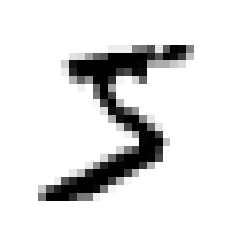

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')

plt.show()

In [39]:
y= y.astype(np.uint8)

In [42]:
#Train test split
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [43]:
#Training Binary Classifier
y_train_5 = (y_train == 5)##true for all values of  5 
y_test_5 = (y_test==5)

In [45]:
#SGDClassifier implimentation
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #Random state for reproducible result
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [55]:
sgd_clf.predict([some_digit]) #Some_digit was equal to 5 and it predicted right

array([ True])

In [56]:
#Performance Measures
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [57]:
#Even if higher accuracy is not good measure for a classifier, different terms
#are defined
#Confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [62]:
#Calculations of precision and accuracy
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [64]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [65]:
#f1score
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [67]:
#Precision recall tradeoff
#getting y_scores
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [68]:
#Precision recall curve
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

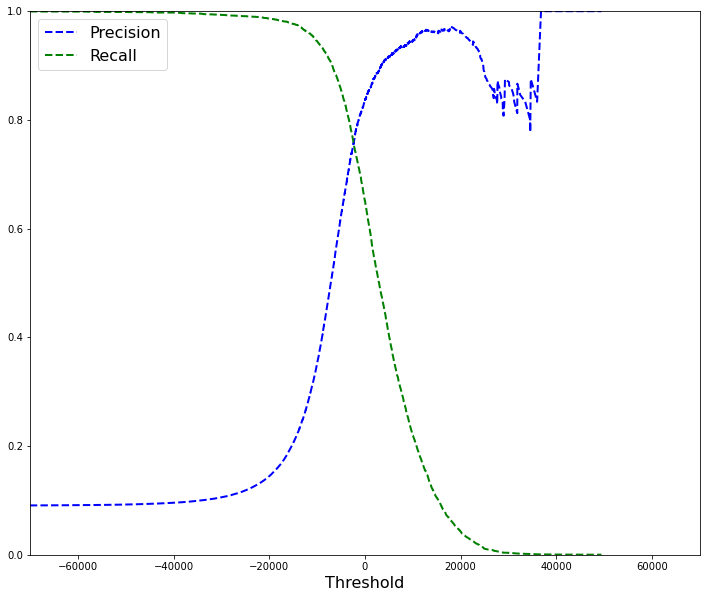

In [71]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision',linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g--',label='Recall',linewidth=2)
    plt.xlabel('Threshold',fontsize=16)
    plt.legend(loc='upper left',fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(12,10))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-70000,70000])
plt.show()

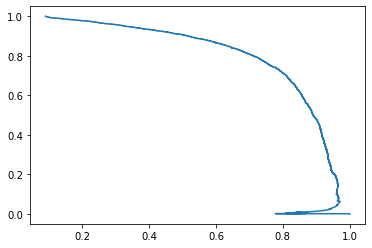

In [73]:
 plt.plot(precisions,recalls)

In [74]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5,y_train_pred_90)


0.9000345901072293

In [75]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [76]:
#ROC receiver opearting characteristics
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

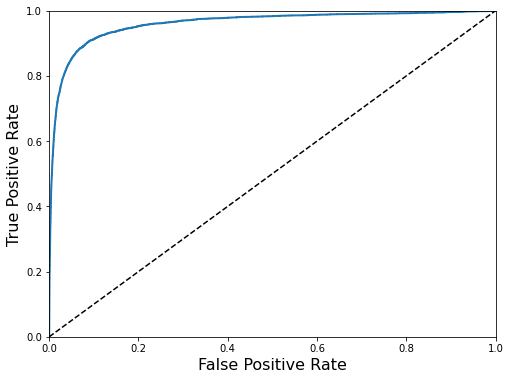

In [79]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5,cv=3,method='predict_proba')

In [83]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

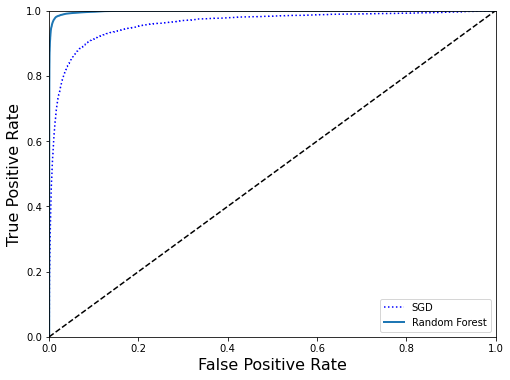

In [89]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()
